# Sequences
The sequences:
- are generated by the `/core/generate_sequences.py` script, which samples the UCI test set, and the only contains `walking, stairs_up, stairs_down` activities.
- are precomputed in order to save some time, as they are pretty heavy to compute and they are serialized using pickle inside the `/pickle` folder.
- they alternate `walking` and `stairs_up | stairs_down` activities

## Initialization

In [3]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from keras.models import load_model

from core.generate_sequences import load_sequences
from core.predict_sequences import predict

In [5]:
def evaluate_sequences(model, sequences_floor_labels):
    successes = predict(model, sequences_floor_labels)

    success_rate = float(successes) / float(len(sequences_floor_labels))

    print(f"Accuracy: {success_rate:.2f} ({successes}/{len(sequences_floor_labels)})")
    
    return success_rate

In [6]:
model = load_model("../models/uci4-128.h5")

## Length: 2
These sequences have length 2 and they sample only `walking` and `stairs_up` activities, meaning they can only have the following form:
- `[walking, stairs_up]`
- `[stairs_up, walking]`

In [7]:
accuracy_2 = evaluate_sequences(model, load_sequences("../pickle/sequences_2.pkl"))

Accuracy: 0.87 (870/1000)


## Length: 3

In [8]:
accuracy_3 = evaluate_sequences(model, load_sequences("../pickle/sequences_3.pkl"))

Accuracy: 0.62 (620/1000)


## Length: 4

In [9]:
accuracy_4 = evaluate_sequences(model, load_sequences("../pickle/sequences_4.pkl"))

Accuracy: 0.51 (510/1000)


## Length: 5

In [10]:
accuracy_5 = evaluate_sequences(model, load_sequences("../pickle/sequences_5.pkl"))

Accuracy: 0.34 (338/1000)


## Length: Random [2-5]
These sequences have length in the inclusive range `[2, 3, 4, 5]`.

In [11]:
accuracy_2_5 = evaluate_sequences(model, load_sequences("../pickle/sequences_2345.pkl"))

Accuracy: 0.57 (574/1000)


## Conclusions

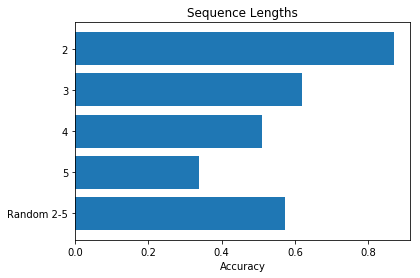

In [12]:
fig, ax = plt.subplots()

lengths = ('2', '3', '4', '5', 'Random 2-5')
y_pos = np.arange(len(lengths))
performance = np.array([accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_2_5])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(lengths)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Sequence Lengths')

plt.show()